# Noise - how it is modeled in synpivimage

Two noise sources are modeled:
- Gaussian noise (baseline+dark noise), which is independent of the photon counts
- Shot noise, which is dependent on the photon counts (Poisson distribution)

In [1]:
import numpy as np

import synpivimage as spi 
spi.__version__

'1.0.0'

Let's first take an image without a particle. This can be done by placing a particle outside of the sensor FOV:

In [2]:
no_particles = spi.Particles(
    x=-100,
    y=-100,
    z=0,
    size=2
)

laser = spi.Laser(shape_factor=10**3, width=1)

## Settings

The noise is controlled via the camera object (`baseline`, `dark_noise` and `shot_noise`). The "randomness" can be controlled via `seed` (to reproduce results, seed=None produces random results)

## Gauss noise

### No noise ($\mu$=0/$\sigma$=0)

In [3]:
cam = spi.Camera(
    nx=128,
    ny=128,
    bit_depth=16,
    qe=1,
    sensitivity=1,
    baseline_noise=0,
    dark_noise=0,
    shot_noise=False,
    fill_ratio_x=1.0,
    fill_ratio_y=1.0,
    particle_image_diameter=2,
    seed=10
)

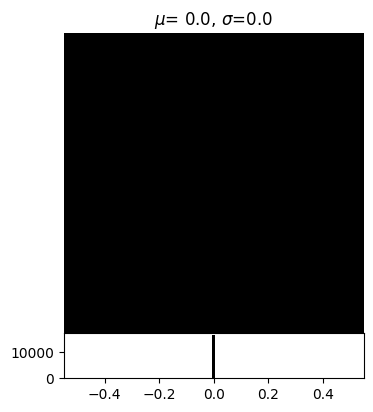

In [4]:
img, _ = spi.take_image(particles=no_particles,
                        cam=cam, laser=laser,
                        particle_peak_count=1000)
ax, _ = img.plot()
_ = ax.set_title(f"$\mu$= {cam.baseline_noise}, $\sigma$={cam.dark_noise}")

### Noise $\mu$=50/$\sigma$=10

cam = spi.Camera(
    nx=128,
    ny=128,
    bit_depth=16,
    qe=1,
    sensitivity=1,
    baseline_noise=50,
    dark_noise=10,
    shot_noise=False,
    fill_ratio_x=1.0,
    fill_ratio_y=1.0,
    particle_image_diameter=2
)

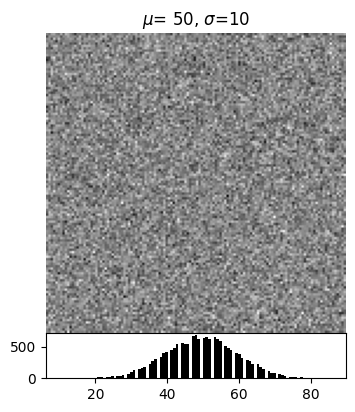

In [5]:
cam.baseline_noise = 50
cam.dark_noise = 10

img, _ = spi.take_image(particles=no_particles,
                        cam=cam, laser=laser,
                        particle_peak_count=1000)
ax, _ = img.plot()
_ = ax.set_title(f"$\mu$= {cam.baseline_noise}, $\sigma$={cam.dark_noise}")

### Noise $\mu$=0/$\sigma$=10

In [6]:
cam.baseline_noise = 0
cam.dark_noise = 10

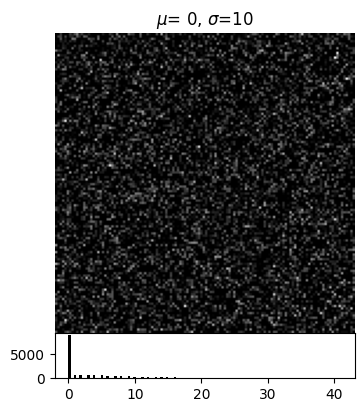

In [7]:
img, _ = spi.take_image(particles=no_particles,
                        cam=cam, laser=laser,
                        particle_peak_count=1000)
ax, _ = img.plot()
_ = ax.set_title(f"$\mu$= {cam.baseline_noise}, $\sigma$={cam.dark_noise}")

### Noise $\mu$=10/$\sigma$=0

In [8]:
cam.baseline_noise = 10
cam.dark_noise = 0

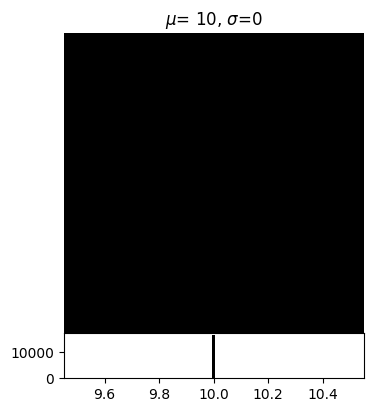

In [9]:
img, _ = spi.take_image(particles=no_particles,
                        cam=cam, laser=laser,
                        particle_peak_count=1000)
ax, _ = img.plot()
_ = ax.set_title(f"$\mu$= {cam.baseline_noise}, $\sigma$={cam.dark_noise}")

## Shot Noise

Let's change the camera settings (smaller sensor, 8bit, ...). We illuminate one central particle and investigate the influence of shot noise

In [10]:
cam = spi.Camera(
    nx=8,
    ny=8,
    bit_depth=8,
    qe=1,
    sensitivity=1,
    baseline_noise=10,
    dark_noise=0,
    shot_noise=False,
    fill_ratio_x=1.0,
    fill_ratio_y=1.0,
    particle_image_diameter=2
)

one_particles = spi.Particles(
    x=4,
    y=4,
    z=0,
    size=2
)

In [11]:
one_particles = laser.illuminate(particles=one_particles)

(<Axes: >, <Axes: >)

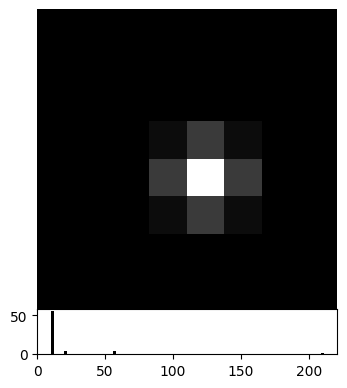

In [12]:
img_without_shot_noise, _ = spi.take_image(particles=one_particles,
                   laser=laser,
                   particle_peak_count=200,
                   cam=cam)
img_without_shot_noise.plot()

In [13]:
cam.shot_noise = True

(<Axes: >, <Axes: >)

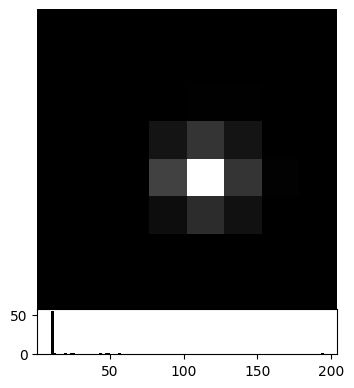

In [14]:
img_with_shot_noise, _ = spi.take_image(particles=one_particles,
                   laser=laser,
                   particle_peak_count=200,
                   cam=cam)
img_with_shot_noise.plot()

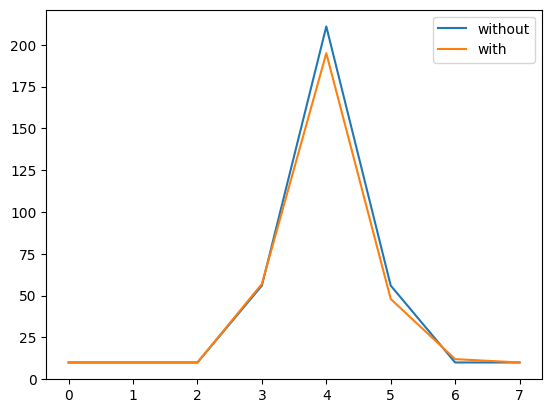

In [15]:
import matplotlib.pyplot as plt
plt.plot(img_without_shot_noise[4, :], label='without')
plt.plot(img_with_shot_noise[4, :], label='with')
plt.legend()